## Station 1 : ETL
#### Dataset : Corn Price History

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings as wn
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
wn.filterwarnings('ignore')

#### Load dataset

In [36]:
dataset = pd.read_csv('datasets/Corn_price_history.csv')
dataset.head()

,Date,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
0,07/31/20,3.15,3.16,0.00,0.08,3.15,3.15,"551,566.00",64381.0,3.16,3.18,3.15
1,07/30/20,3.16,3.16,0.00,0.08,3.16,3.16,"555,042.00",104818.0,3.16,3.19,3.15
2,07/29/20,3.16,3.16,-0.05,-1.41,3.16,3.16,"551,611.00",118641.0,3.20,3.22,3.15
3,07/28/20,3.20,3.20,-0.05,-1.54,3.20,3.20,"542,505.00",96543.0,3.23,3.24,3.20
4,07/27/20,3.26,3.25,-0.01,-0.38,3.25,3.26,"544,625.00",83374.0,3.25,3.28,3.23


#### Dataset Description

In [4]:
dataset.describe()

,Last,Settlement Price,Change,% Change,Bid,Ask,CVol,Open,High,Low
count,504.000000,504.000000,503.000000,503.000000,504.000000,504.00000,504.000000,504.000000,504.000000,504.000000
mean,3.714841,3.715575,-0.001431,-0.027614,3.713274,3.71621,183851.303571,3.718571,3.751468,3.682976
std,0.294112,0.294755,0.050668,1.329223,0.293949,0.29404,73075.440282,0.296124,0.299338,0.287637
min,3.120000,3.120000,-0.250000,-5.980000,3.120000,3.12000,49930.000000,3.120000,3.170000,3.090000
25%,3.597500,3.590000,-0.030000,-0.735000,3.590000,3.60000,132417.500000,3.600000,3.630000,3.560000
50%,3.730000,3.730000,0.000000,0.000000,3.730000,3.73000,170685.000000,3.730000,3.760000,3.705000
75%,3.830000,3.830000,0.020000,0.635000,3.830000,3.83250,219179.750000,3.840000,3.860000,3.800000
max,4.600000,4.590000,0.170000,4.700000,4.600000,4.60000,498116.000000,4.640000,4.680000,4.520000


* `Date`: The date of the trading day for the corn futures contract.
* `Last`: The last traded price for the corn futures contract on that trading day.
* `Settlement Price`: The official settlement price for the corn futures contract on that trading day.
* `Change`: The change in the Last price from the previous trading day.
* `% Change`: The percentage change in the Last price from the previous trading day.
* `Bid`: The highest price a buyer is willing to pay for the corn futures contract on that trading day.
* `Ask`: The lowest price a seller is willing to accept for the corn futures contract on that trading day.
* `Open` Interest: The total number of outstanding contracts for the corn futures contract as of the end of that trading day.
* `CVol`: The volume of contracts traded during that trading day.
* `Open`: The opening price for the corn futures contract on that trading day.
* `High`: The highest price reached by the corn futures contract during that trading day.
* `Low`: The lowest price reached by the corn futures contract during that trading day.

#### Dataset Info

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              504 non-null    object 
 1   Last              504 non-null    float64
 2   Settlement Price  504 non-null    float64
 3   Change            503 non-null    float64
 4   % Change          503 non-null    float64
 5   Bid               504 non-null    float64
 6   Ask               504 non-null    float64
 7   Open Interest     504 non-null    object 
 8   CVol              504 non-null    float64
 9   Open              504 non-null    float64
 10  High              504 non-null    float64
 11  Low               504 non-null    float64
dtypes: float64(10), object(2)
memory usage: 47.4+ KB


#### Handle Missing values

In [6]:
dataset.isnull().sum()*100/len(dataset)

Date                0.000000
Last                0.000000
Settlement Price    0.000000
Change              0.198413
% Change            0.198413
Bid                 0.000000
Ask                 0.000000
Open Interest       0.000000
CVol                0.000000
Open                0.000000
High                0.000000
Low                 0.000000
dtype: float64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              504 non-null    object 
 1   Last              504 non-null    float64
 2   Settlement Price  504 non-null    float64
 3   Change            503 non-null    float64
 4   % Change          503 non-null    float64
 5   Bid               504 non-null    float64
 6   Ask               504 non-null    float64
 7   Open Interest     504 non-null    object 
 8   CVol              504 non-null    float64
 9   Open              504 non-null    float64
 10  High              504 non-null    float64
 11  Low               504 non-null    float64
dtypes: float64(10), object(2)
memory usage: 47.4+ KB


In [8]:
# we need to drop null values in dataset
dataset = dataset.dropna()
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%m/%d/%y')
dataset.head()

,Date,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
0,2020-07-31,3.15,3.16,0.00,0.08,3.15,3.15,"551,566.00",64381.0,3.16,3.18,3.15
1,2020-07-30,3.16,3.16,0.00,0.08,3.16,3.16,"555,042.00",104818.0,3.16,3.19,3.15
2,2020-07-29,3.16,3.16,-0.05,-1.41,3.16,3.16,"551,611.00",118641.0,3.20,3.22,3.15
3,2020-07-28,3.20,3.20,-0.05,-1.54,3.20,3.20,"542,505.00",96543.0,3.23,3.24,3.20
4,2020-07-27,3.26,3.25,-0.01,-0.38,3.25,3.26,"544,625.00",83374.0,3.25,3.28,3.23


## Station 2 : Feature Engineering

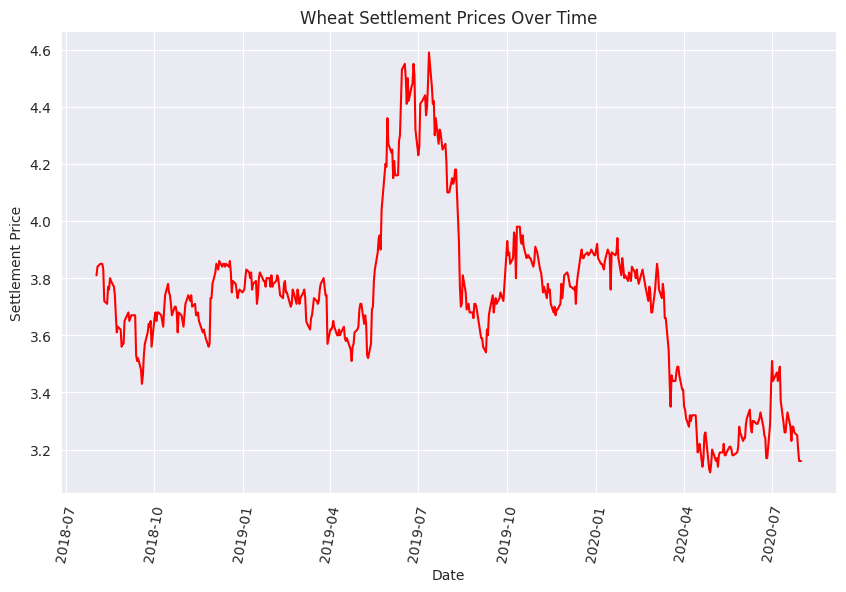

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
# Format x-axis date ticks
sns.lineplot(x='Date', y='Settlement Price', data=dataset,c='red')
#sns.barplot(x='Date', y='Settlement Price', data=dataset)
plt.title('Wheat Settlement Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Settlement Price')
plt.xticks(rotation=80)
plt.show()

* The graph represents the historical trend of the settlement prices for corn futures over time. 
* The x-axis shows the dates on which the corn futures were traded, and the y-axis shows the corresponding settlement prices for those trading days. 

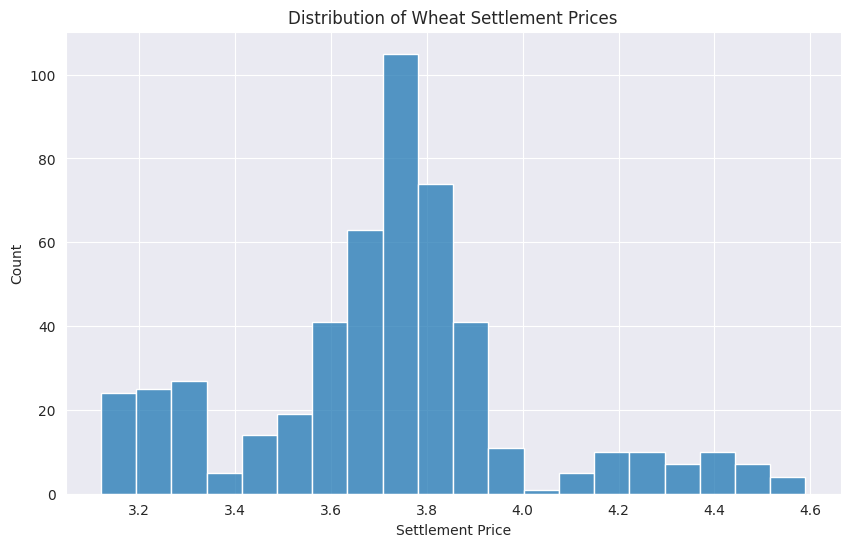

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Settlement Price', data=dataset, bins=20)
plt.title('Distribution of Wheat Settlement Prices')
plt.xlabel('Settlement Price')
plt.ylabel('Count')
plt.show()

* The graph represents the distribution of the settlement prices for corn futures. 
* The x-axis shows the range of settlement prices, divided into 20 bins, and the y-axis shows the count of how many times a given settlement price appears in the dataset.

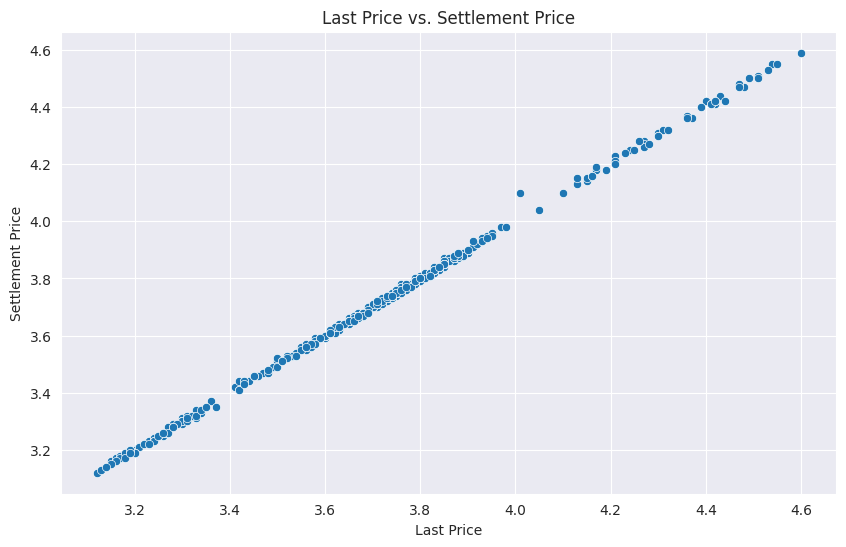

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Last', y='Settlement Price', data=dataset)
plt.title('Last Price vs. Settlement Price')
plt.xlabel('Last Price')
plt.ylabel('Settlement Price')
plt.show()

* The scatter plot provides a visual representation of the relationship between the 'Last' and 'Settlement 
*  Price' features, showing whether there is a positive, negative, or no correlation between the two features.
* Each dot represents a single data point, and the position of the dot on the plot indicates the value of the 'Last' feature on the x-axis and the value of the 'Settlement Price' feature on the y-axis. 
* The scatter plot can be used to identify any patterns or trends in the relationship between the two features, as well as any potential outliers or unusual data points.

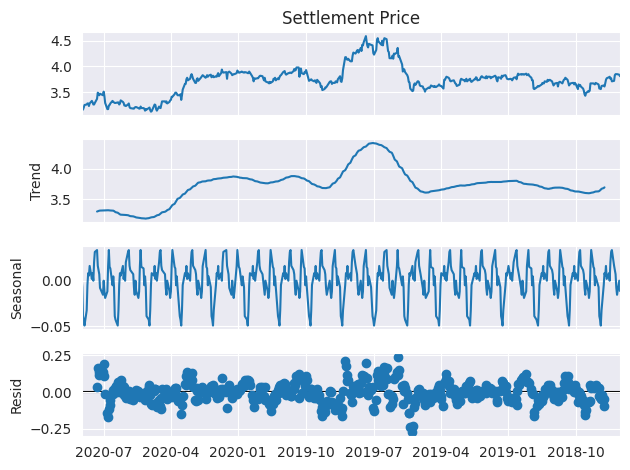

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

dataset['Date'] = pd.to_datetime(dataset['Date'], format='%m/%d/%y')
dataset.set_index('Date', inplace=True)

result = seasonal_decompose(dataset['Settlement Price'], model='additive', period=30)
result.plot()
plt.show()

* The resulting plot shows four subplots: the original time-series data, the trend component, the seasonal component, and the residual component. 
* The decomposition allows us to visually identify the underlying patterns and fluctuations in the data, and can be used to detect any seasonal or trend-based patterns that may be present in the data.

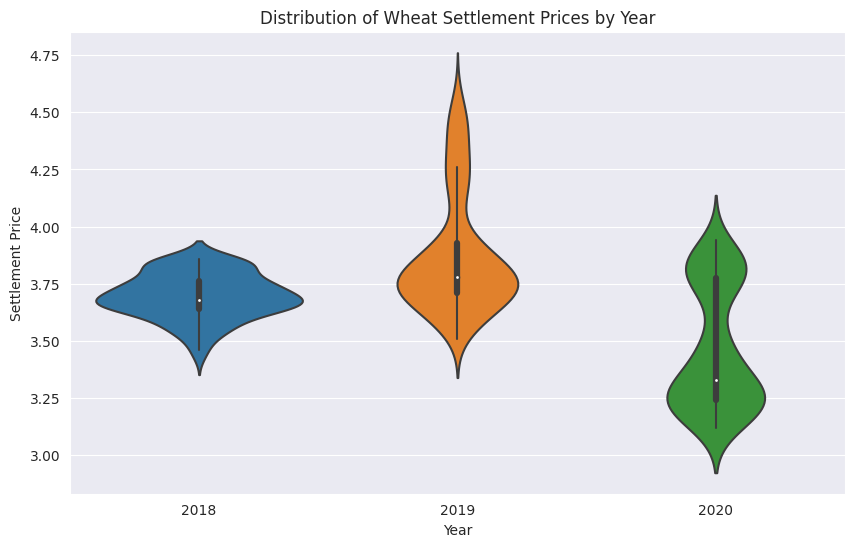

In [13]:
# violin plot
dataset['Year'] = dataset.index.year
plt.figure(figsize=(10, 6))
sns.violinplot(x='Year', y='Settlement Price', data=dataset)
plt.title('Distribution of Wheat Settlement Prices by Year')
plt.xlabel('Year')
plt.ylabel('Settlement Price')
plt.show()

* The violin plot provides a visual representation of how the distribution of the settlement prices varies across different years, showing whether there are any significant differences in the shape of the distribution or the range of prices between different years. 
* The width of each curve indicates the relative frequency of the settlement prices at each point along the y-axis, with wider curves indicating a higher frequency of prices in that range. 
* The violin plot can be used to compare the distribution of the settlement prices between different years and identify any trends or patterns in the data.

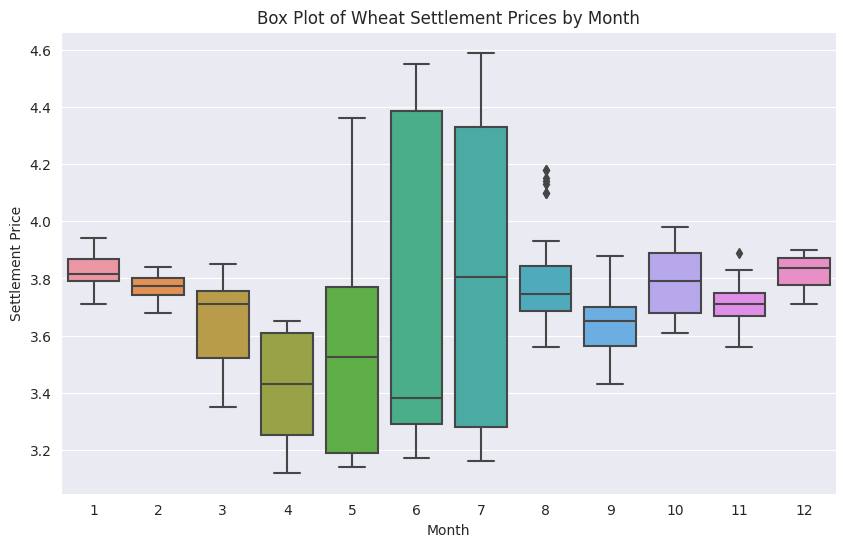

In [14]:
dataset['Month'] = dataset.index.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Settlement Price', data=dataset)
plt.title('Box Plot of Wheat Settlement Prices by Month')
plt.xlabel('Month')
plt.ylabel('Settlement Price')
plt.show()

* The box plot provides a visual representation of how the distribution of the settlement prices varies across different months, showing the median, quartiles, and outliers for each month. 
* The boxes indicate the range of the middle 50% of the settlement prices for each month, with the line inside the box indicating the median value. 
* The whiskers extend to the minimum and maximum values within 1.5 times the interquartile range of the box, and any points outside the whiskers are considered outliers. 
* The box plot can be used to compare the distribution of the settlement prices between different months and identify any trends or patterns in the data.

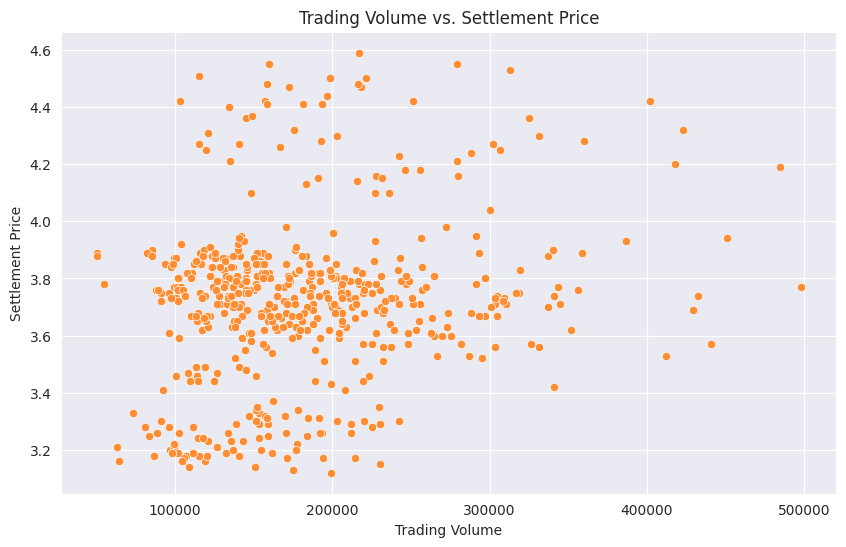

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CVol', y='Settlement Price', data=dataset,c='#FF8D33')
plt.title('Trading Volume vs. Settlement Price')
plt.xlabel('Trading Volume')
plt.ylabel('Settlement Price')
plt.show()

* The scatter plot provides a visual representation of the relationship between the 'CVol' and 'Settlement Price' features, showing whether there is a positive, negative, or no correlation between the two features. 
* Each dot represents a single data point, and the position of the dot on the plot indicates the value of the 'CVol' feature on the x-axis and the value of the 'Settlement Price' feature on the y-axis. 
* The scatter plot can be used to identify any patterns or trends in the relationship between the two features, as well as any potential outliers or unusual data points.

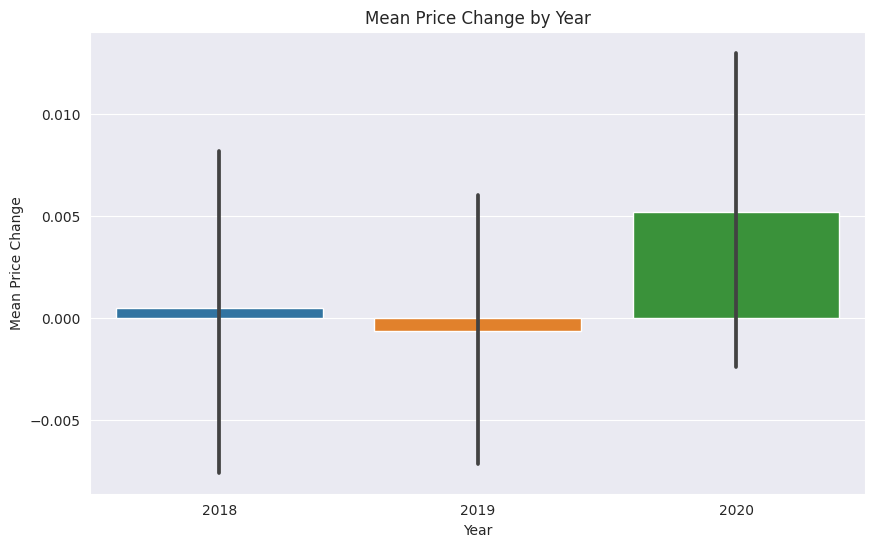

In [16]:
dataset['Price Change'] = dataset['Settlement Price'] - dataset['Settlement Price'].shift(1)

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Price Change', data=dataset)
plt.title('Mean Price Change by Year')
plt.xlabel('Year')
plt.ylabel('Mean Price Change')
plt.show()

* The bar plot provides a visual representation of the mean change in the settlement prices from one day to the next across different years, showing whether there are any significant differences in the price changes between different years. 
* Each bar represents the mean price change for a single year, and the height of the bar indicates the magnitude of the mean price change. 
* The bar plot can be used to compare the mean price changes between different years and identify any trends or patterns in the data.

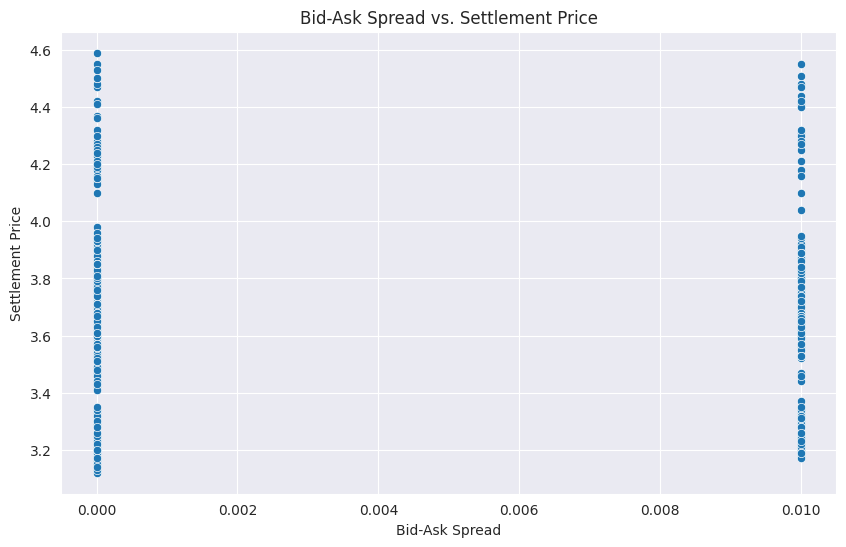

In [17]:
dataset['Bid-Ask Spread'] = dataset['Ask'] - dataset['Bid']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bid-Ask Spread', y='Settlement Price', data=dataset)
plt.title('Bid-Ask Spread vs. Settlement Price')
plt.xlabel('Bid-Ask Spread')
plt.ylabel('Settlement Price')
plt.show()

* The scatter plot provides a visual representation of the relationship between the 'Bid-Ask Spread' and 'Settlement Price' features, showing whether there is a positive, negative, or no correlation between the two features. 
* Each dot represents a single data point, and the position of the dot on the plot indicates the value of the 'Bid-Ask Spread' feature on the x-axis and the value of the 'Settlement Price' feature on the y-axis. 
* The scatter plot can be used to identify any patterns or trends in the relationship between the two features, as well as any potential outliers or unusual data points.

In [18]:
dataset['Open Interest'] = dataset['Open Interest'].str.replace(',','')
dataset['Open Interest']=dataset['Open Interest'].astype(float)

### Correlation between Attributes

<Axes: >

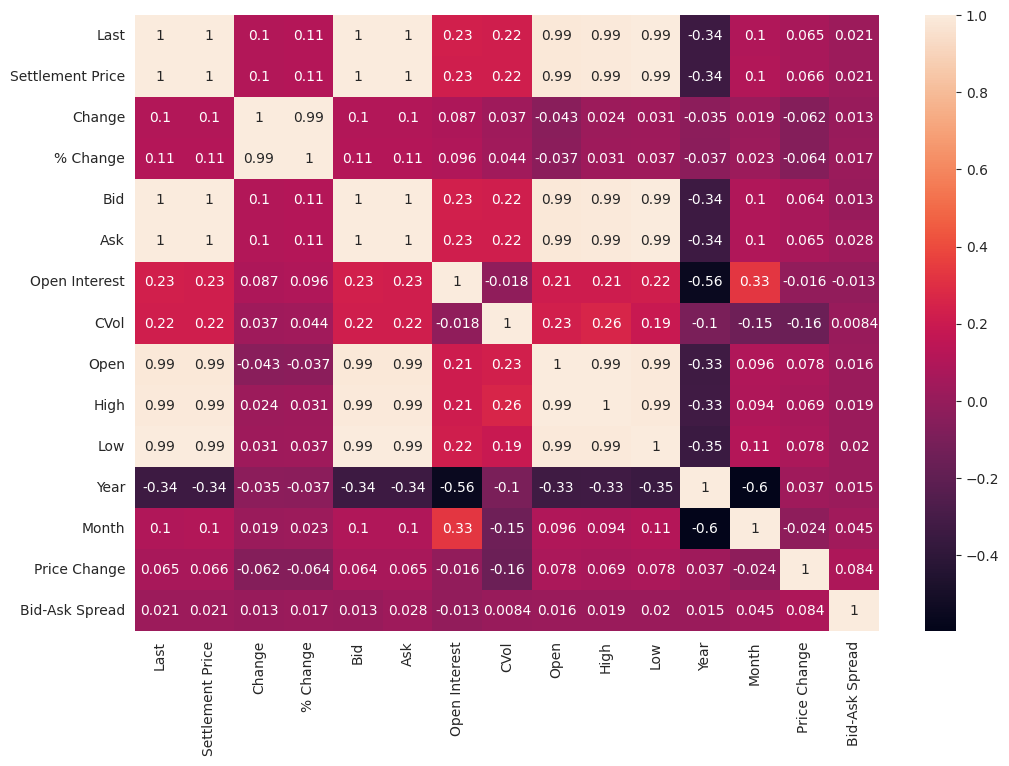

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(),annot=True)

* Correlation measures the degree to which two attributes are related to each other.
* Positive correlation means two attributes tend to increase or decrease together, negative correlation means they tend to move in opposite directions, and neutral correlation means there is no relationship between the attributes.
* Correlation can be measured using statistical techniques such as the Pearson correlation coefficient, which ranges from -1 to 1.
* Correlation can help understand the relationship between attributes and detect patterns and trends in the data.
* Correlation does not imply causation, which means one attribute does not necessarily cause the other even if they are correlated.
* Correlation can be influenced by outliers, the scale of the data, and the sample size, so it is important to use multiple methods to analyze and interpret data.

In [20]:
df_var = dataset.drop('Settlement Price',axis=1)
df_target = dataset['Settlement Price']

### Drop the columns which are highly correlated to each other

In [21]:
corr_matrix = df_var.corr().abs()

# Create a set to keep track of dropped columns
dropped_cols = set()

# Iterate through the correlation matrix and drop correlated columns
for col in corr_matrix.columns:
    if col not in dropped_cols:
        correlated_cols = corr_matrix.index[corr_matrix[col] > 0.98].tolist()
        correlated_cols.remove(col)  # Remove the current column from the list of correlated columns
        df_var.drop(correlated_cols, axis=1, inplace=True)
        dropped_cols.update(correlated_cols)


<Axes: >

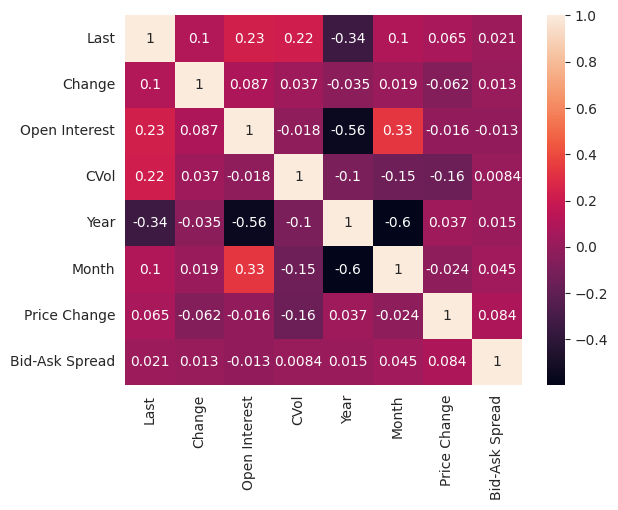

In [22]:
sns.heatmap(df_var.corr(),annot=True)

### Predictive Model

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2020-07-31 to 2018-08-02
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Last              503 non-null    float64
 1   Settlement Price  503 non-null    float64
 2   Change            503 non-null    float64
 3   % Change          503 non-null    float64
 4   Bid               503 non-null    float64
 5   Ask               503 non-null    float64
 6   Open Interest     503 non-null    float64
 7   CVol              503 non-null    float64
 8   Open              503 non-null    float64
 9   High              503 non-null    float64
 10  Low               503 non-null    float64
 11  Year              503 non-null    int32  
 12  Month             503 non-null    int32  
 13  Price Change      502 non-null    float64
 14  Bid-Ask Spread    503 non-null    float64
dtypes: float64(13), int32(2)
memory usage: 58.9 KB


#### Set the target value as a settlement Price 

In [24]:
dataset = dataset.dropna()

In [25]:
x = dataset.drop('Settlement Price',axis=1)
y = dataset['Settlement Price']

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### Linear Regression model
Apply the machine learning model to predict the settlement prices

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

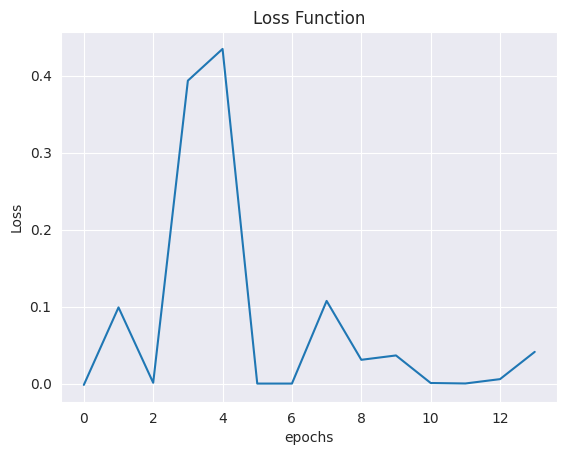

In [28]:
sns.lineplot(model.coef_)
plt.title('Loss Function')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

* This graph show the how rate of loss or error reduce during training of machine learning model

In [32]:
acc = model.score(x_test,y_test)
print('The accuracy of the model is ',acc*100,'%')

The accuracy of the model is  99.963822051187 %


### Mean Square Error Analysis

In [33]:
y_pred = model.predict(x_test)

In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)

In [35]:
print("The Mean square the error of the model is ", mse)

The Mean square the error of the model is  2.5112064381144814e-05
